In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    #The 5%
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #The 5 older
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    #The 95%
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95 older
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [10]:
print(train_samples)
print(train_labels)

[43 91 43 ... 88 62 83]
[1 0 1 ... 1 0 1]


In [5]:
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
#for i in scaled_train_samples:
    #print(i)

### Simple tf.keras Sequantial Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [9]:
model = Sequential([
    
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), \
              loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, \
          validation_split=0.1, batch_size=10, epochs=30, \
          shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7146 - accuracy: 0.4767 - val_loss: 0.7078 - val_accuracy: 0.5048
Epoch 2/30
189/189 - 0s - loss: 0.6983 - accuracy: 0.4995 - val_loss: 0.6877 - val_accuracy: 0.5048
Epoch 3/30
189/189 - 0s - loss: 0.6784 - accuracy: 0.7751 - val_loss: 0.6658 - val_accuracy: 0.9619
Epoch 4/30
189/189 - 0s - loss: 0.6567 - accuracy: 0.9074 - val_loss: 0.6414 - val_accuracy: 0.9238
Epoch 5/30
189/189 - 0s - loss: 0.6326 - accuracy: 0.8815 - val_loss: 0.6142 - val_accuracy: 0.9238
Epoch 6/30
189/189 - 0s - loss: 0.6063 - accuracy: 0.8788 - val_loss: 0.5848 - val_accuracy: 0.9238
Epoch 7/30
189/189 - 0s - loss: 0.5784 - accuracy: 0.8868 - val_loss: 0.5544 - val_accuracy: 0.9238
Epoch 8/30
189/189 - 0s - loss: 0.5506 - accuracy: 0.8937 - val_loss: 0.5243 - val_accuracy: 0.9238
Epoch 9/30
189/189 - 0s - loss: 0.5234 - accuracy: 0.8921 - val_loss: 0.4946 - val_accuracy: 0.9238
Epoch 10/30
189/189 - 0s - loss: 0.4972 - accuracy: 0.9016 - val_loss: 0.4660 - val_accuracy: 0.9238

## Predict

In [1]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

NameError: name 'model' is not defined

In [17]:
for i in predictions:
    print(i)

[0.0997059  0.90029407]
[0.78284746 0.21715252]
[0.95908123 0.04091875]
[0.5726348  0.42736512]
[0.04703888 0.95296115]
[0.85535103 0.14464894]
[0.95155436 0.04844562]
[0.27998185 0.7200182 ]
[0.8031428  0.19685721]
[0.0574171 0.9425829]
[0.05095698 0.949043  ]
[0.05303005 0.9469699 ]
[0.48037535 0.5196247 ]
[0.44960782 0.55039215]
[0.04896076 0.9510392 ]
[0.0574171 0.9425829]
[0.08489326 0.9151068 ]
[0.30558625 0.6944138 ]
[0.23290434 0.7670956 ]
[0.95721817 0.04278185]
[0.95745546 0.04254461]
[0.9058313  0.09416869]
[0.05303005 0.9469699 ]
[0.92329633 0.07670362]
[0.07270239 0.92729765]
[0.8699954  0.13000458]
[0.10549227 0.89450777]
[0.05518252 0.9448174 ]
[0.95155436 0.04844562]
[0.6872886  0.31271145]
[0.9553948  0.04460525]
[0.05973644 0.9402635 ]
[0.05518252 0.9448174 ]
[0.8219726  0.17802736]
[0.06214327 0.93785673]
[0.21153462 0.7884654 ]
[0.89551455 0.10448549]
[0.05518252 0.9448174 ]
[0.07858185 0.92141813]
[0.06723074 0.9327692 ]
[0.9594633 0.0405367]
[0.9576913  0.04230862

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [21]:
for i in rounded_predictions:
    print(i)

1
0
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
0
0
0
1
1
0
0
1
1
1
1
1
0
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1


In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [35]:
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)
print(cm)

[[ 952   98]
 [  50 1000]]


In [55]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
#from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[ 952   98]
 [  50 1000]]


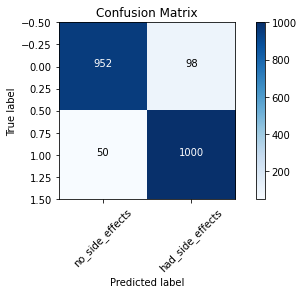

In [56]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 1. model.save()

In [57]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [3]:
from tensorflow.keras.models import load_model
model = load_model('models/medical_trial_model.h5')

OSError: SavedModel file does not exist at: models/medical_trial_model.h5/{saved_model.pbtxt|saved_model.pb}

In [60]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [61]:
json_string = model.to_json()

In [62]:
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_re

In [63]:
# import json model
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [64]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. ick_marks=np.aramge(lemodel.save_weights()

In [65]:
import os.path
if os.path.isfile('models/medical_trial_weights.h5') is False:
    model.save_weights('models/medical_trial_weights.h5')

In [67]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [68]:
model2.load_weights('models/medical_trial_weights.h5')

In [2]:
model2.get_weights()

NameError: name 'model2' is not defined

In [ ]:
model = load_model()

## Convolutional neural network